### 9-16: Error Types, P-Values, False-Positive Risk, and Power Analysis
Isabella Turco  
QNC

#### Exercise  
Do a post-hoc power analysis to determine the number of data samples needed to achieve 80% power for a series of possible effect sizes. Notes and tips:

1. Given that the data have already been collected, note that this is technically a "post-hoc" power analysis and is for demonstration purposes only. Normally these analyses must be done before collecting data.
2. Assume that a "data sample" is simply the non-parametric correlation coefficient between pupil diameter and LC activty measured in a given session.
3. Thus, to obtain a null distribution of these data samples, compute the correlation coefficients on simulated data that are independently generated from Poisson (for LC spiking data) and Gaussian (for pupil data)distributions.
4. Then plot n (number of data samples, corresponding to correlation coefficients measured in a single expermental session) needed for 80% power as a function of effect sizes.
5. To compute power, you can use TTestIndPower in Python, or sampsizepwr in Matlab

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.power import TTestIndPower

For 80% Power:
Effect Size = 0.2 Requires Sample Size = 394.0
Effect Size = 0.5 Requires Sample Size = 64.0
Effect Size = 0.8 Requires Sample Size = 26.0
Effect Size = 1.0 Requires Sample Size = 17.0


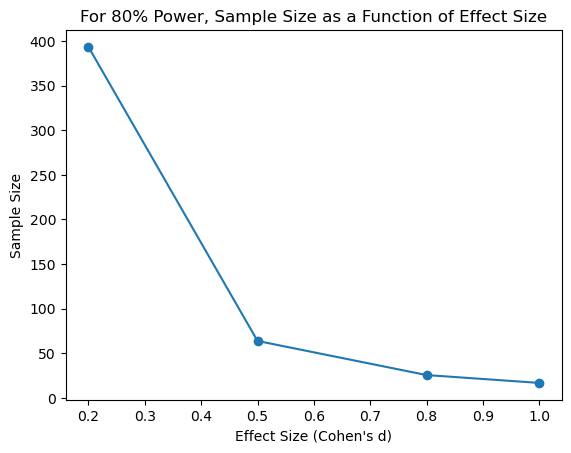

In [45]:
p = 0.05 
power = 0.80 
mu_pupil = 0
mu_lc = 2
sem = 2 
n = 100 

# simulate data 
pupil_diameter = st.norm.rvs(loc = mu_pupil, scale = sem, size = n) #Gaussian 
lc_activity = st.poisson.rvs(mu = mu_lc, size = n) #Poisson

# compute non-parametric correlation coefficients on simulated data --> null distribution of data samples 
null_distribution, prob = st.spearmanr(pupil_diameter, lc_activity)

# plot number of data samples (correlation coefficients in single experimental session) for 80% power as a function of effect sizes 
effect_size = [0.2, 0.5, 0.8, 1.0]
get_sample_size = TTestIndPower()
sample_size = np.array([get_sample_size.solve_power(effect_size = d, alpha = p, power = power, alternative = 'two-sided') for d in effect_size])

print("For 80% Power:")
for d, n in zip(effect_size, sample_size):
    print(f"Effect Size = {d} Requires Sample Size = {np.ceil(n)}")

plt.plot(effect_size, sample_size, marker='o')
plt.xlabel('Effect Size (Cohen\'s d)')
plt.ylabel('Sample Size')
plt.title('For 80% Power, Sample Size as a Function of Effect Size')
plt.show()